Imported the libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
df_employee = pd.read_csv("/content/ML case Study - ML case Study.csv")

In [ ]:
df_employee.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [ ]:
df_employee.shape

(1589, 8)

In [ ]:
df_cities = pd.read_csv("/content/cities - cities.csv")

In [ ]:
df_cities.head(10)

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,NaN


In [ ]:
df_colleges = pd.read_csv("/content/Colleges - Colleges.csv")

In [ ]:
df_colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [ ]:
df_employee.isnull().sum()# checked null values

,0
College,0
City,0
Role,0
Previous CTC,0
Previous job change,0
Graduation Marks,0
EXP (Month),0
CTC,0


In [ ]:
city_data = df_cities

Mapping

In [ ]:
city_type_map = {df_cities: 1 for df_cities in city_data['Metrio City']} # match the df_cities with city_data if metro city will give 1

In [ ]:
print(city_type_map)

{'Mumbai': 1, 'Delhi': 1, 'Kolkata': 1, 'Chennai': 1, 'Bangalore': 1, 'Hyderabad': 1, 'Ahmedabad': 1, 'Pune': 1, 'Surat': 1}


In [ ]:
city_type_map.update ({df_cities: 0 for df_cities in city_data['non-metro cities']})


In [ ]:
city_type_map

{'Mumbai': 1,
 'Delhi': 1,
 'Kolkata': 1,
 'Chennai': 1,
 'Bangalore': 1,
 'Hyderabad': 1,
 'Ahmedabad': 1,
 'Pune': 1,
 'Surat': 1,
 'Dehradun': 0,
 'Durgapur': 0,
 'Asansol': 0,
 'Rourkela': 0,
 'Kozhikode': 0,
 'Rajpur Sonarpur': 0,
 'Kolhapur': 0,
 'Ajmer': 0,
 nan: 0}

In [ ]:
df_employee['city_type'] = df_employee['City'].map(city_type_map) #match city with city_type_map and add new column (city_type)

In [ ]:
df_employee.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,city_type
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,0
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,0
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,0
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,0
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,0


In [ ]:
college_tier_map = {college: 2 for college in df_colleges['Tier 1']} #mapping
college_tier_map.update({college: 1 for college in df_colleges['Tier 2']})
college_tier_map.update({college: 0 for college in df_colleges['Tier 3']})

In [ ]:
df_employee['college_tier'] = df_employee['College'].map(college_tier_map) #new column added

In [ ]:
df_employee.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,city_type,college_tier
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,0,1
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,0,1
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,0,0
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,0,0
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,0,2


Converted cetogorical data to numeric data

In [ ]:
df_employee = pd.get_dummies(df_employee, columns=['Role'])

In [ ]:
df_employee

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,city_type,college_tier,Role_Executive,Role_Manager
0,SVNIT Surat,Asansol,55523,3,66,19,71406.58,0,1,False,True
1,NIT Bhopal,Ajmer,57081,1,84,18,68005.87,0,1,True,False
2,"IEM, Kolkata",Rajpur Sonarpur,60347,2,52,28,76764.02,0,0,True,False
3,"KIIT, Bhubaneswar",Ajmer,49010,2,81,33,82092.39,0,0,True,False
4,DTU,Durgapur,57879,4,74,32,73878.10,0,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,61285,3,44,60,77283.59,1,2,True,False
1585,NIT Warangal,Rajpur Sonarpur,63140,1,44,24,68416.86,0,2,True,False
1586,NIT Tiruchipally (Trichy),Ahmedabad,44907,1,60,19,70186.19,1,2,True,False
1587,IIIT Hyderabad,Durgapur,52054,2,67,29,73394.09,0,2,True,False


Convert Role Executive to integer type data

In [ ]:
df_employee ['Role_Executive'] = df_employee['Role_Executive'].astype(int) # change true and fales into int which is 0 and 1


In [ ]:
df_employee

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,city_type,college_tier,Role_Executive,Role_Manager
0,SVNIT Surat,Asansol,55523,3,66,19,71406.58,0,1,0,True
1,NIT Bhopal,Ajmer,57081,1,84,18,68005.87,0,1,1,False
2,"IEM, Kolkata",Rajpur Sonarpur,60347,2,52,28,76764.02,0,0,1,False
3,"KIIT, Bhubaneswar",Ajmer,49010,2,81,33,82092.39,0,0,1,False
4,DTU,Durgapur,57879,4,74,32,73878.10,0,2,1,False
...,...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,61285,3,44,60,77283.59,1,2,1,False
1585,NIT Warangal,Rajpur Sonarpur,63140,1,44,24,68416.86,0,2,1,False
1586,NIT Tiruchipally (Trichy),Ahmedabad,44907,1,60,19,70186.19,1,2,1,False
1587,IIIT Hyderabad,Durgapur,52054,2,67,29,73394.09,0,2,1,False


In [ ]:
df_employee.drop('Role_Manager', axis=1, inplace=True)

In [ ]:
df_employee

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,city_type,college_tier,Role_Executive
0,SVNIT Surat,Asansol,55523,3,66,19,71406.58,0,1,0
1,NIT Bhopal,Ajmer,57081,1,84,18,68005.87,0,1,1
2,"IEM, Kolkata",Rajpur Sonarpur,60347,2,52,28,76764.02,0,0,1
3,"KIIT, Bhubaneswar",Ajmer,49010,2,81,33,82092.39,0,0,1
4,DTU,Durgapur,57879,4,74,32,73878.10,0,2,1
...,...,...,...,...,...,...,...,...,...,...
1584,BITS Pilani (Goa Campus),Surat,61285,3,44,60,77283.59,1,2,1
1585,NIT Warangal,Rajpur Sonarpur,63140,1,44,24,68416.86,0,2,1
1586,NIT Tiruchipally (Trichy),Ahmedabad,44907,1,60,19,70186.19,1,2,1
1587,IIIT Hyderabad,Durgapur,52054,2,67,29,73394.09,0,2,1


drop categorical data of city and college

In [ ]:
df_employee.drop('City', axis=1, inplace=True)

In [ ]:
df_employee.drop('College', axis=1, inplace=True)

In [ ]:
df_employee

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,city_type,college_tier,Role_Executive
0,55523,3,66,19,71406.58,0,1,0
1,57081,1,84,18,68005.87,0,1,1
2,60347,2,52,28,76764.02,0,0,1
3,49010,2,81,33,82092.39,0,0,1
4,57879,4,74,32,73878.10,0,2,1
...,...,...,...,...,...,...,...,...
1584,61285,3,44,60,77283.59,1,2,1
1585,63140,1,44,24,68416.86,0,2,1
1586,44907,1,60,19,70186.19,1,2,1
1587,52054,2,67,29,73394.09,0,2,1


# Outlier checking


In [ ]:
df_employee.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,city_type,college_tier,Role_Executive
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.514160,1.024544,0.793581
std,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.499957,0.838330,0.404862
min,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000,0.000000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000,0.000000,1.000000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,1.000000,1.000000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,2.000000,1.000000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,2.000000,1.000000


In [ ]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   int64  
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   city_type            1589 non-null   int64  
 6   college_tier         1589 non-null   int64  
 7   Role_Executive       1589 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 99.4 KB


In [ ]:
features = ['Previous CTC','Previous job change','Graduation Marks','EXP (Month)','CTC']

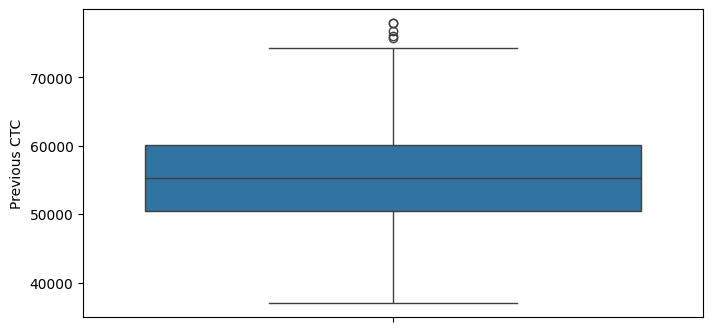

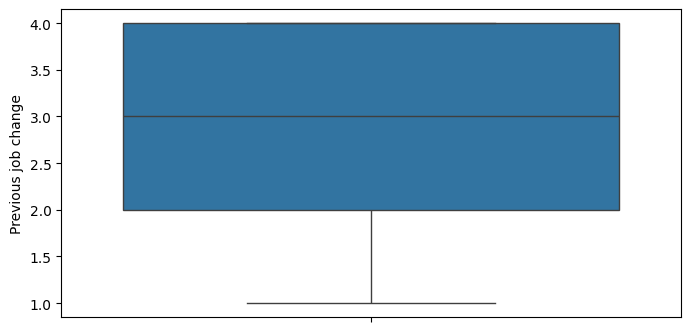

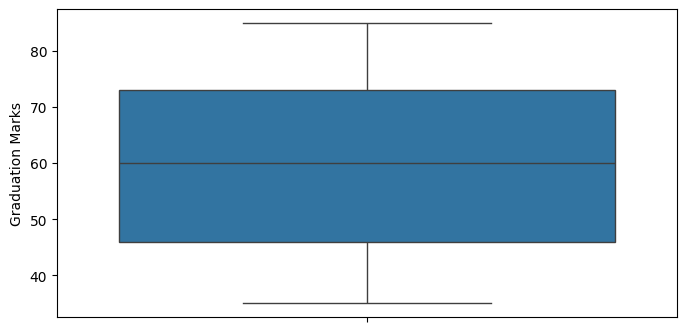

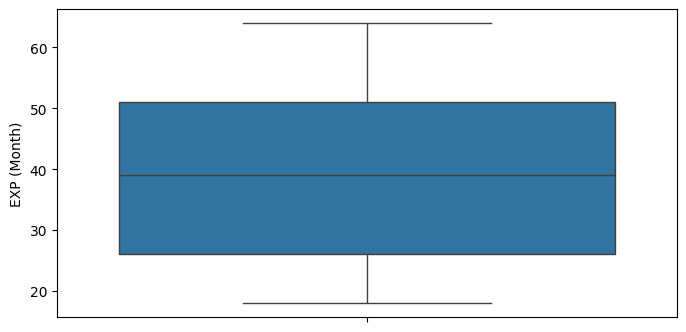

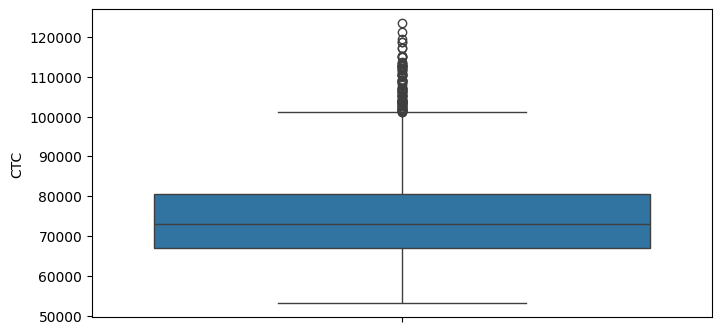

In [ ]:
for feature in features:
 plt.figure(figsize=(8,4)) # (8,4) is size of figure
 sn.boxplot(data=df_employee[feature])
 plt.show()

Numbers of outliers

In [ ]:
q1 = df_employee['Previous CTC'].quantile(0.25)
q3 = df_employee ['Previous CTC'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_employee[(df_employee['Previous CTC'] < lower_bound) | (df_employee['Previous CTC'] > upper_bound)]
print("Outliers in 'Previous CTC':")
print(len(outliers))


Outliers in 'Previous CTC':
5


In [ ]:
q1 = df_employee['CTC'].quantile(0.25)
q3 = df_employee ['CTC'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_employee[(df_employee['CTC'] < lower_bound) | (df_employee['CTC'] > upper_bound)]
print("Outliers in 'CTC':")
print(len(outliers))


Outliers in 'CTC':
94


Outlier treatment

In [ ]:
q1 = df_employee['Previous CTC'].quantile(0.25)
q3 = df_employee ['Previous CTC'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_employee[(df_employee['Previous CTC'] < lower_bound) | (df_employee['Previous CTC'] > upper_bound)]
print("Outliers in 'Previous CTC':")
print(len(outliers))
df_employee.loc[df_employee['Previous CTC'] > upper_bound, 'Previous CTC'] = upper_bound
df_employee.loc[df_employee['Previous CTC'] < lower_bound, 'Previous CTC'] = lower_bound


Outliers in 'Previous CTC':
5


<ipython-input-35-606551769364>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '74495.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_employee.loc[df_employee['Previous CTC'] > upper_bound, 'Previous CTC'] = upper_bound


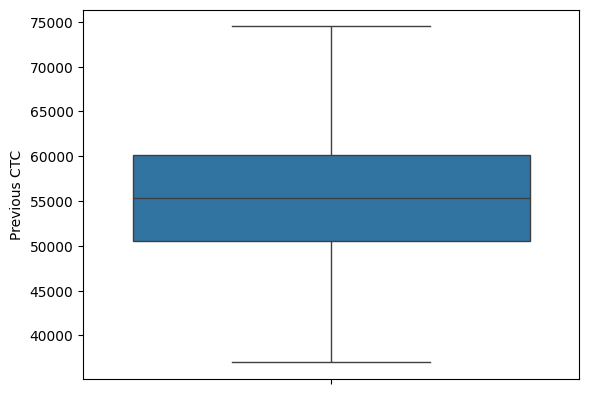

In [ ]:
sn.boxplot(data=df_employee['Previous CTC'])
plt.show()

In [ ]:
q1 = df_employee['CTC'].quantile(0.25)
q3 = df_employee ['CTC'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_employee[(df_employee['CTC'] < lower_bound) | (df_employee['CTC'] > upper_bound)]
print("Outliers in 'CTC':")
print(len(outliers))
df_employee.loc[df_employee['CTC'] > upper_bound, 'CTC'] = upper_bound
df_employee.loc[df_employee['CTC'] < lower_bound, 'CTC'] = lower_bound


Outliers in 'CTC':
94


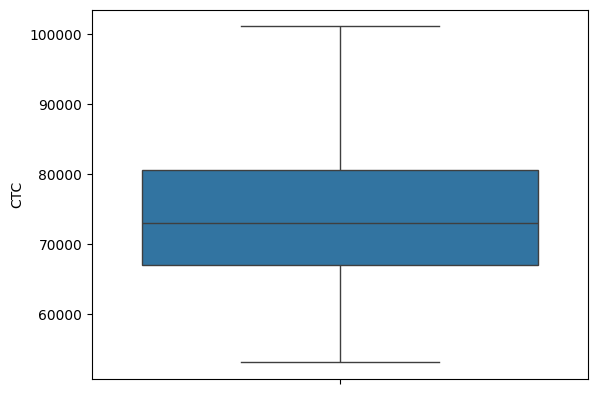

In [ ]:
sn.boxplot(data=df_employee['CTC'])
plt.show()

checking correlation

In [ ]:
corr_matrix = df_employee.corr()

In [ ]:
corr_matrix

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,city_type,college_tier,Role_Executive
Previous CTC,1.000000,0.006280,-0.032854,0.118746,0.246917,0.003851,-0.042154,-0.012643
Previous job change,0.006280,1.000000,0.019267,0.023488,0.009485,0.051670,0.055060,0.017150
Graduation Marks,-0.032854,0.019267,1.000000,-0.057061,-0.004665,-0.018616,-0.003539,-0.017858
EXP (Month),0.118746,0.023488,-0.057061,1.000000,0.310451,-0.023613,-0.011752,0.026751
CTC,0.246917,0.009485,-0.004665,0.310451,1.000000,-0.026940,0.025930,-0.611024
city_type,0.003851,0.051670,-0.018616,-0.023613,-0.026940,1.000000,0.014946,0.048671
college_tier,-0.042154,0.055060,-0.003539,-0.011752,0.025930,0.014946,1.000000,-0.014749
Role_Executive,-0.012643,0.017150,-0.017858,0.026751,-0.611024,0.048671,-0.014749,1.000000


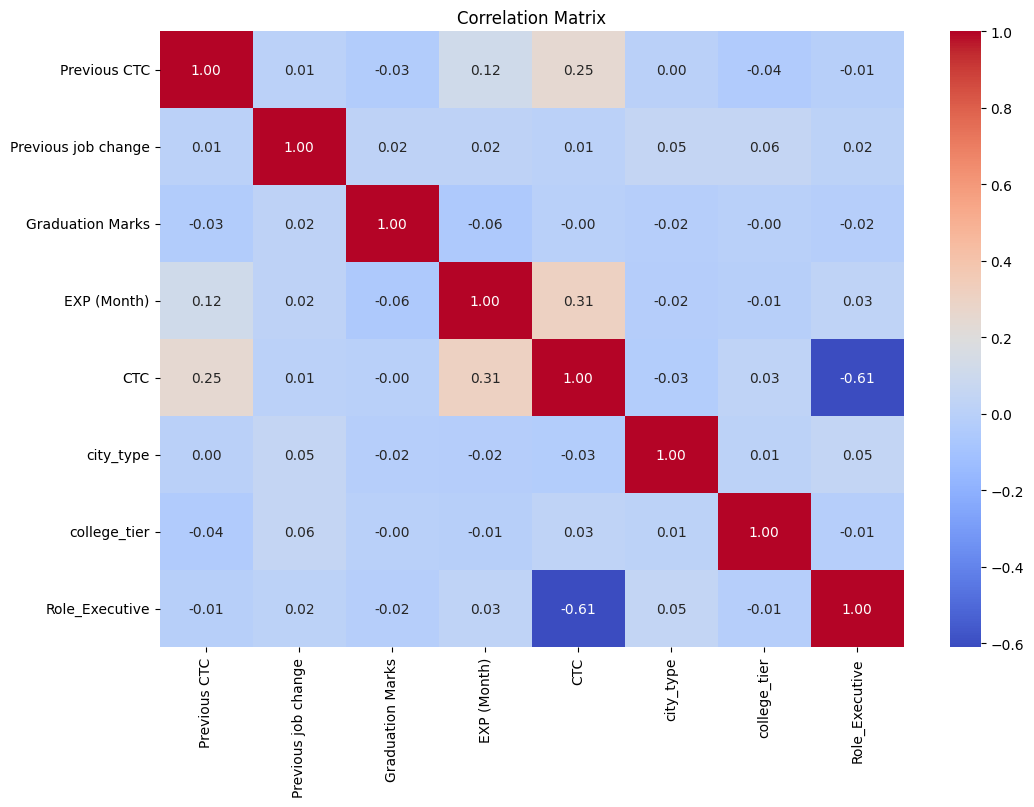

In [ ]:
#Visualize correlation matrix
plt.figure(figsize=(12, 8))
sn.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Train_Test_Split

In [ ]:
X= df_employee.drop(['CTC','Previous job change','Graduation Marks'],axis=1)

In [ ]:
X.head()

,Previous CTC,EXP (Month),city_type,college_tier,Role_Executive
0,55523.0,19,0,1,0
1,57081.0,18,0,1,1
2,60347.0,28,0,0,1
3,49010.0,33,0,0,1
4,57879.0,32,0,2,1


In [ ]:
y = df_employee['CTC']

In [ ]:
y.head()

,CTC
0,71406.58
1,68005.87
2,76764.02
3,82092.39
4,73878.10


In [ ]:
from sklearn.model_selection  import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 12)

In [ ]:
print(X_train.shape,X_test.shape)

(1271, 5) (318, 5)


In [ ]:
print(y_train.shape,y_test.shape)

(1271,) (318,)


In [ ]:
X_train_slr = X_train[['EXP (Month)']]

In [ ]:
X_train_slr

,EXP (Month)
1384,18
1234,45
1036,22
789,62
1077,21
...,...
432,42
1283,18
1265,64
1277,32


In [ ]:
X_test_slr = X_test[['EXP (Month)']]

In [ ]:
X_test_slr

,EXP (Month)
248,19
1542,46
1482,30
269,49
1085,39
...,...
1467,38
1545,35
1510,18
188,41


Simple LinearRegression Model(One input and one output)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_slr = LinearRegression()

In [ ]:
model_slr.fit(X_train_slr,y_train)

LinearRegression()

In [ ]:
y_pred_slr_test = model_slr.predict(X_test_slr)

In [ ]:
y_pred_slr_test

array([69969.4461116 , 76632.77805558, 72684.13690359, 77373.14827157,
       74905.24755158, 70709.8163276 , 73177.71704759, 77619.93834357,
       74164.87733559, 71696.9766156 , 71696.9766156 , 80087.83906356,
       69969.4461116 , 74411.66740759, 76385.98798358, 71450.1865436 ,
       71943.7666876 , 76632.77805558, 69722.65603961, 72684.13690359,
       71203.3964716 , 78113.51848757, 74411.66740759, 71943.7666876 ,
       75645.61776758, 78360.30855957, 74411.66740759, 79347.46884757,
       79594.25891957, 79100.67877557, 69722.65603961, 69722.65603961,
       80087.83906356, 75398.82769558, 69969.4461116 , 74411.66740759,
       78853.88870357, 79347.46884757, 75398.82769558, 74411.66740759,
       75152.03762358, 69969.4461116 , 69722.65603961, 78607.09863157,
       80334.62913556, 71203.3964716 , 72190.5567596 , 72190.5567596 ,
       75892.40783958, 71203.3964716 , 75398.82769558, 78113.51848757,
       72684.13690359, 74164.87733559, 73671.29719159, 77866.72841557,
      

In [ ]:
from sklearn. metrics import r2_score

In [ ]:
r2_score(y_test,y_pred_slr_test)

0.1190037349453319

In [ ]:
y_pred_slr_train = model_slr.predict(X_train_slr)

In [ ]:
r2_score(y_train,y_pred_slr_train)

0.09067976756122853

Multiple LinearRegression (Multiple input and one output)

In [ ]:
model_mlr = LinearRegression()

In [ ]:
model_mlr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_mlr_test = model_mlr.predict(X_test)

In [ ]:
y_pred_mlr_test

array([62472.86138347, 68722.96864245, 87243.20307477, 70660.31558823,
       84696.7377137 , 66611.68212155, 68458.01645539, 75141.01588091,
       89045.88252809, 66191.08890478, 68653.8269884 , 76186.620985  ,
       64540.93281126, 68659.91034878, 85818.30095023, 66075.26259589,
       65976.25636181, 74749.10718393, 64968.17548343, 67805.30976097,
       86024.8711491 , 78777.18178585, 89053.10570162, 67741.87145567,
       69907.43351223, 73690.76738511, 71556.35147167, 79898.55010132,
       77102.87820167, 88165.57298617, 64681.50665839, 82186.43416701,
       94645.74875843, 74164.10005464, 67027.68257585, 69368.886295  ,
       74321.62651573, 79226.10745356, 73604.49463121, 86321.61803585,
       73991.26099449, 83524.17654238, 83083.89888614, 72397.41956823,
       78695.69044004, 66224.65746167, 67322.08551187, 69122.82254121,
       92284.79017696, 84967.73171109, 71581.49649424, 71700.09280066,
       84956.25149719, 70597.00182583, 72583.38177367, 77309.43187676,
      

In [ ]:
r2_score(y_test,y_pred_mlr)

0.528676866478647

In [ ]:
y_pred_mlr_train = model_mlr.predict(X_train)

In [ ]:
r2_score(y_train,y_pred_mlr_train)

0.5198862268572858

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train) #Scaled X_train variable. Scaled only x variable because it has multiple features to compare

In [ ]:
X_train_scaled

array([[ 0.83787855, -1.48059872, -1.02792719,  1.1507666 ,  0.50957142],
       [ 0.28606783,  0.43104981, -1.02792719, -1.23329917,  0.50957142],
       [ 0.70727782, -1.19739153, -1.02792719,  1.1507666 , -1.96243345],
       ...,
       [-1.60055476,  1.77628396, -1.02792719,  1.1507666 , -1.96243345],
       [ 0.56943824, -0.48937355,  0.97283155, -1.23329917,  0.50957142],
       [ 0.57426414, -0.70177895,  0.97283155, -1.23329917,  0.50957142]])

In [ ]:
X_test_scaled = scaler.transform(X_test) #Scaled X_test variable (multiple features)

In [ ]:
X_test_scaled

array([[-1.60930169, -1.40979692, -1.02792719, -0.04126628,  0.50957142],
       [-1.63870948,  0.50185161, -1.02792719, -1.23329917,  0.50957142],
       [ 0.37595009, -0.63097715, -1.02792719, -1.23329917, -1.96243345],
       ...,
       [-2.54401687, -1.48059872,  0.97283155, -0.04126628,  0.50957142],
       [ 0.58632887,  0.14784262,  0.97283155,  1.1507666 ,  0.50957142],
       [ 0.6790765 ,  1.63468036, -1.02792719,  1.1507666 ,  0.50957142]])

In [ ]:
model_ridge = Ridge(alpha=0.5)

In [ ]:
model_ridge.fit(X_train_scaled,y_train)

Ridge(alpha=0.5)

In [ ]:
y_pred_ridge = model_ridge.predict(X_test_scaled)

In [ ]:
y_pred_ridge

array([62477.6514298 , 68725.32623846, 87238.60691642, 70661.8694759 ,
       84692.20694487, 66614.79859238, 68460.28143352, 75141.15871308,
       89040.53187252, 66194.50926862, 68656.22640749, 76186.37081193,
       64544.75434595, 68662.07839019, 85813.43706022, 66078.34287507,
       65979.3956505 , 74749.45506162, 64972.2121904 , 67807.81897494,
       86020.38128585, 78776.22474411, 89047.80195932, 67744.46294041,
       69909.11018038, 73691.29758659, 71557.48082215, 79897.07081032,
       77101.98859   , 88160.00818546, 64685.70232502, 82183.12036868,
       94638.08995192, 74164.33686782, 67031.05943249, 69371.2312518 ,
       74322.05929405, 79224.50992936, 73604.9050689 , 86316.62485327,
       73991.71233007, 83520.96374832, 83080.37665537, 72398.40020124,
       78694.17403329, 66228.10913596, 67325.18326161, 69125.43160708,
       92278.28857092, 84963.42980425, 71582.60460926, 71701.40153053,
       84952.2948768 , 70598.44968916, 72584.32508062, 77308.48418429,
      

In [ ]:
r2_score(y_test,y_pred_ridge)

0.5286805760711271

In [ ]:
y_pred_ridge_train = model_ridge.predict(X_train_scaled)

In [ ]:
r2_score(y_train,y_pred_ridge_train)

0.5198861480946185

Validation Curve

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
parameter_range = np.logspace(-2,8,100) # give 100 values between -2 and 8

In [ ]:
parameter_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [ ]:
train_score,test_score = validation_curve(Ridge(),X_train_scaled,y_train,param_name='alpha',param_range= parameter_range,scoring='r2')

In [ ]:
test_score_mean = np.mean(test_score,axis=1)

In [ ]:
test_score_mean

array([ 0.50463675,  0.50463679,  0.50463683,  0.50463689,  0.50463697,
        0.50463706,  0.50463718,  0.50463733,  0.50463752,  0.50463775,
        0.50463805,  0.50463843,  0.5046389 ,  0.50463949,  0.50464024,
        0.50464118,  0.50464236,  0.50464384,  0.50464568,  0.50464798,
        0.50465084,  0.50465437,  0.50465872,  0.50466404,  0.50467046,
        0.50467811,  0.50468705,  0.50469721,  0.50470826,  0.50471938,
        0.50472898,  0.50473413,  0.50472973,  0.50470719,  0.50465241,
        0.50454274,  0.50434248,  0.50399644,  0.5034209 ,  0.50249171,
        0.50102926,  0.49878155,  0.49540766,  0.4904669 ,  0.48342125,
        0.47366107,  0.4605626 ,  0.44357982,  0.4223609 ,  0.39686422,
        0.3674383 ,  0.33483254,  0.30012434,  0.26457683,  0.22946552,
        0.19591966,  0.16481323,  0.1367187 ,  0.11191688,  0.09044399,
        0.07215556,  0.0567906 ,  0.04402645,  0.03352029,  0.02493736,
        0.0179681 ,  0.01233678,  0.00780442,  0.00416806,  0.00

In [ ]:
max(test_score_mean)

0.5047341303756999

In [ ]:
np.where(test_score_mean == max(test_score_mean)) #0.5 max value lies on indices(s.no.) 31.

(array([31]),)

In [ ]:
 parameter_range[31]

13.530477745798061

In [ ]:
model_ridge_best = Ridge(alpha = parameter_range[31])

In [ ]:
model_ridge_best.fit(X_train_scaled,y_train)

Ridge(alpha=13.530477745798061)

In [ ]:
y_pred_ridge_best = model_ridge_best.predict(X_test_scaled)

In [ ]:
r2_score(y_test,y_pred_ridge_best)

0.5287194692057247

In [ ]:
y_pred_ridge_best_train = model_ridge_best.predict(X_train_scaled)

In [ ]:
r2_score(y_train,y_pred_ridge_best_train)

0.5198297139033858

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model_ls = Lasso(alpha = 0.5)

In [ ]:
model_ls.fit(X_train_scaled,y_train)

Lasso(alpha=0.5)

In [ ]:
y_pred_ls = model_ls.predict(X_test_scaled)

In [ ]:
r2_score(y_test,y_pred_ls)

0.5286724407420833

In [ ]:
y_pred_ls_train = model_ls.predict(X_train_scaled)

In [ ]:
r2_score(y_train,y_pred_ls_train)

0.5198862172802157

Decision tree model (Non_linear model)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_dtr = DecisionTreeRegressor(random_state=42)

In [ ]:
model_dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_dtr = model_dtr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_dtr)

0.33263521530112117

In [ ]:
y_pred_dtr_train = model_dtr.predict(X_train)

In [ ]:
r2_score(y_train,y_pred_dtr_train)

1.0

In [ ]:
model_dtr1 = DecisionTreeRegressor(max_depth=5,min_samples_split=10,min_samples_leaf=5) #use multiple features in model

In [ ]:
model_dtr1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [ ]:
y_pred_dtr1 = model_dtr1.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_dtr1)

0.569800864633319

In [ ]:
y_pred_dtr1_train = model_dtr1.predict(X_train)

In [ ]:
r2_score(y_train,y_pred_dtr1_train)

0.6380551049763281

Decision tree using GridSearchCV parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'max_depth':[None,3,5,10],'min_samples_split':[2,10,15],'min_samples_leaf':[1,5,10]} #hypertuning

In [ ]:
gsv = GridSearchCV(estimator=model_dtr,param_grid = parameters,cv=5)

In [ ]:
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 15]})

In [ ]:
best_model_dtr = gsv.best_estimator_ #best hyperparameters identified by GridSearchCV.

In [ ]:
y_pred_best_model_dtr = best_model_dtr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_best_model_dtr)

0.5531812839859429

In [ ]:
y_pred_best_model_dtr_train = best_model_dtr.predict(X_train)

In [ ]:
r2_score(y_train,y_pred_best_model_dtr_train)

0.5861669463258573

Random forest model (non_linear_esemble_model)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rfr = RandomForestRegressor(n_estimators=150,random_state=42)

In [ ]:
model_rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [ ]:
y_pred_model_rfr = model_rfr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_model_rfr)

0.6032236569357892

In [ ]:
y_pred_model_rfr_train = model_rfr.predict(X_train)

In [ ]:
r2_score(y_train,y_pred_model_rfr_train)

0.9408369985882568

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt']        # Number of features to consider for each split
}

In [ ]:
grid_search = GridSearchCV(estimator=model_rfr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
336 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=150, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=2)

In [ ]:
best_rfr_model=grid_search.best_estimator_

In [ ]:
y_pred_rfr_best=best_rfr_model.predict(X_test)

In [ ]:
r2_score(y_test,y_pred_rfr_best)

0.5938199061868475

In [ ]:
# checking train accuracy for Random forest

In [ ]:
y_pred_rfr_train = best_rfr_model.predict(X_train)

In [ ]:
r2_score(y_train,y_pred_rfr_train)

0.734621478257914

Ada boost ensemble technique(boosting)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model_adaboost = AdaBoostRegressor(n_estimators=20,random_state=42)

In [ ]:
model_adaboost.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=20, random_state=42)

In [ ]:
y_pred_model_adaboost = model_adaboost.predict(X_test)


In [ ]:
r2_score(y_test,y_pred_model_adaboost)

0.5644476458305965

In [ ]:
y_pred_model_adaboost_train = model_adaboost.predict(X_train)

In [ ]:
r2_score(y_train,y_pred_model_adaboost_train)

0.5756150422386513

#Your views about the problem statement?
###The task of predicting employee salaries based on various features such as previous CTC, job change history, graduation marks, experience, college tier, and city type is highly relevant in today’s data-driven employment landscape. Accurate salary predictions can help organizations ensure equitable compensation, attract talent, and make informed hiring decisions. The challenge lies in selecting appropriate features and models to achieve reliable predictions, considering the complexity and nuance.


#What will be your approach to solving this task?
####  Data Preprocessing: I began with data cleaning, handling missing values, encoding categorical variables (e.g., college tier, city type, and employee role), and normalizing numerical features to prepare the dataset for modeling.
#### Exploratory Data Analysis (EDA): Conducted to understand relationships between features and the target variable (salary), including correlation analysis and visualization.
#### Model Selection and Training: Evaluated various regression models, including Multipl linear regression model,Decision tree, Random froest, Adq boost.
#### Parameter tuning and cross validation.
####Model evalution:checked performance using r2_score and used GridsearchCV for model performance improvement.




#What ML model options did you have available to perform this task?
#### Smiple linear regression
#### Muliplr linear regression
#### Ridge model
#### Lasso model
#### Desision tree
#### Random forest
#### Ada boost



#Which model’s performance is best and what could be the possible reason for that?
####Random forest performed best out of all and gave 60% accuracy.The reason may be due to,it can capture the complex features. It also reduces the over fitting.



#What steps can you take to improve this selected model’s performance even further?
#### More hyperparameter tuning
#### Data size increasing
#### Creating new features
